## Importing libraries

In [14]:
import import_ipynb

from preprocessing import dataset

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

## Creating classifiers and setting parameters

In [2]:
names = [
    "decision_tree",
    "k_nearest_neighbours",
    "log_regression",
    "random_forest"
]

classifiers = [
    DecisionTreeClassifier(criterion = "gini",
                           splitter = "best",
                           max_depth = 10),
    KNeighborsClassifier(n_neighbors = 7,
                         algorithm = "auto",
                         p = 1,
                         n_jobs = -1),
    LogisticRegression(max_iter = 250,
                       multi_class = "multinomial",
                       n_jobs = -1),
    RandomForestClassifier(n_estimators = 250,
                           criterion = "gini",
                           max_depth = 10,
                           n_jobs = -1)
]

## Splitting dataset into training and test sets

In [3]:
X = dataset.loc[:, dataset.columns != 'y']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

smote = SMOTE(random_state = 0)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Pipelines and accuracy measures for classifiers

NameError: name 'plot_roc_curve' is not defined

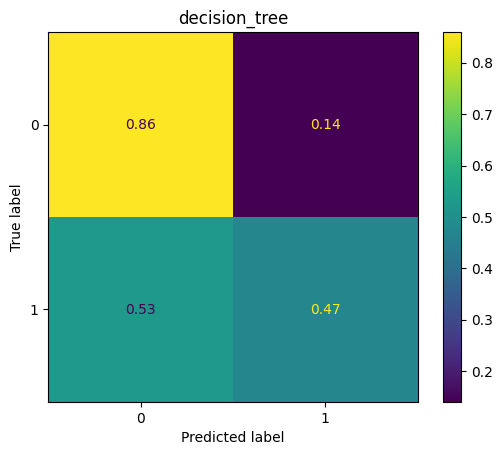

In [10]:
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    
    accuracy = ConfusionMatrixDisplay.from_estimator(clf,
                                                     X_test,
                                                     y_test,
                                                     normalize = 'true')
    
    y_test_preds = clf.predict(X_test)
    
    f1_scores = f1_score(y_test, y_test_preds, average = 'weighted')
    auc_scores = roc_auc_score(y_test, y_test_preds, average = 'weighted')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_test_preds)    
    roc_auc = auc(fpr,tpr)
    
    accuracy.ax_.set_title(name)
    RocCurveDisplay(clf, X_test, y_test) 
    
    print(name)
    print(accuracy.confusion_matrix)
    print(f1_scores)
    print(auc_scores)

plt.show()

## Tuning the hyper-parameters